# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


Enter the number of iterations: 50


<ipython-input-15-ddf3afd26562>:21: RuntimeWarning: divide by zero encountered in log
  logLikelihoods = [np.log(likelihood(lam, x))]
<ipython-input-15-ddf3afd26562>:10: RuntimeWarning: overflow encountered in power
  return np.exp(-lam) * np.power(lam, np.array(x)).prod() / gamma(np.array(x)+1).prod()
<ipython-input-15-ddf3afd26562>:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-lam) * np.power(lam, np.array(x)).prod() / gamma(np.array(x)+1).prod()


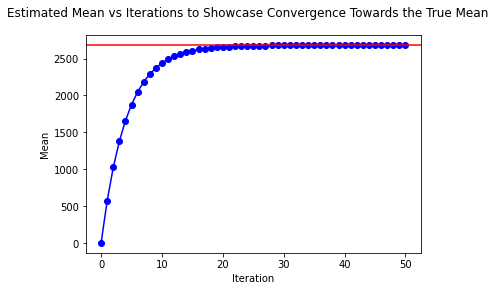

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma

from google.colab import files
files.upload()

def likelihood(lam, x):
  return np.exp(-lam) * np.power(lam, np.array(x)).prod() / gamma(np.array(x)+1).prod()

data = pd.read_csv('nyc_bb_bicyclist_counts.csv')

x = data['BB_COUNT']

alpha = 0.001
lam = 0
iterations = int(input("Enter the number of iterations: "))

estimates = [lam]
logLikelihoods = [np.log(likelihood(lam, x))]

nLam = sum(x - lam) * alpha + lam 
est = abs(nLam - lam)


for i in range(iterations):
  nLam = sum(x - lam) * alpha + lam
  est = abs(nLam - lam)
  lam = nLam
  estimates.append(lam)
  logLikelihoods.append(np.log(likelihood(lam, x)))

fig = plt.figure()
fig.suptitle('Estimated Mean vs Iterations to Showcase Convergence Towards the True Mean')
plot, = plt.plot(estimates, 'bo-')
plt.axhline(y=np.mean(x), color='r')
plt.xlabel('Iteration')
plt.ylabel('Mean')
plt.show()

## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [2]:
# 